In [1]:
import os
os.environ["OMP_NUM_THREADS"] = "1" 
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN


In [2]:
def color_cluster(i):
    colors = ('black', 'orange', 'yellow', 'magenta') 
    if (i == -1):
        color = 'blue'  # muestras con ruido en azul
    else:
        if (i > NUM_CLASSES-1):
            color = 'cyan'
        else:
            color = colors[i]
    return color


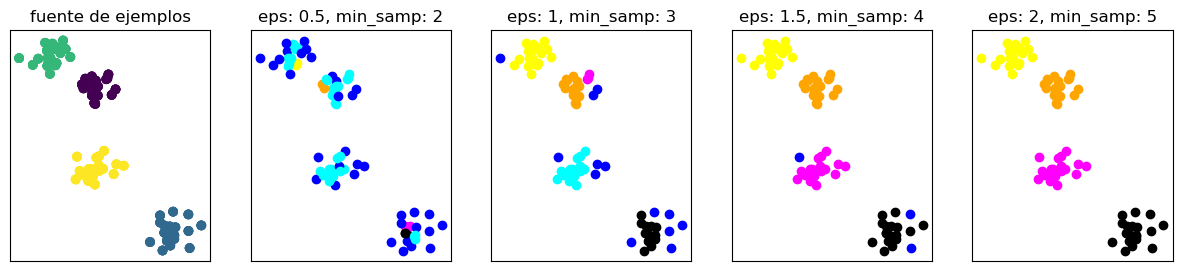

In [5]:
NUM_CLASSES = 4 
NUM_FEATURES = 2
X,y = make_blobs(n_samples=80, n_features=NUM_FEATURES, centers=NUM_CLASSES, cluster_std=1, random_state=14)

fig,axs = plt.subplots(1,NUM_CLASSES+1,figsize=(15,3), subplot_kw={'xticks':(), 'yticks':()})
    
for f, eps, min_samples in zip(range(NUM_CLASSES), [0.5,1,1.5,2],
                               [2,3,4,5]):
    dbscan_clustering = DBSCAN(eps = eps, min_samples = min_samples)
    clusters = dbscan_clustering.fit_predict(X)

    axs[0].scatter(X[:,0], X[:,1], c = y)
    axs[0].set_title('fuente de ejemplos')

    for i in range(len(y)):
        axs[f+1].scatter(X[i,0],X[i,1], c = color_cluster(clusters[i]))
    axs[f+1].set_title('eps: '+ str(eps) + ', min_samp: ' +
                       str(min_samples))
    
plt.show()